<a href="https://colab.research.google.com/github/DaffaHamsy/Mini-Project-SLO2/blob/main/CIFAR_10_and_CIFAR_100_Pre_Processing_and_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

169001437/169001437 [==============================] - 3s 0us/step
Epoch 1/10
782/782 [==============================] - 95s 120ms/step - loss: 1.7851 - accuracy: 0.1019 - val_loss: 1.5388 - val_accuracy: 0.0493
Epoch 2/10
782/782 [==============================] - 92s 118ms/step - loss: 1.5232 - accuracy: 0.0967 - val_loss: 1.2826 - val_accuracy: 0.0611
Epoch 3/10
782/782 [==============================] - 93s 119ms/step - loss: 1.4084 - accuracy: 0.0975 - val_loss: 1.3467 - val_accuracy: 0.0515
Epoch 4/10
782/782 [==============================] - 93s 119ms/step - loss: 1.3335 - accuracy: 0.0968 - val_loss: 1.2103 - val_accuracy: 0.0800
Epoch 5/10
782/782 [==============================] - 93s 119ms/step - loss: 1.2798 - accuracy: 0.0962 - val_loss: 1.1112 - val_accuracy: 0.1190
Epoch 6/10
782/782 [==============================] - 91s 116ms/step - loss: 1.2390 - accuracy: 0.0980 - val_loss: 1.1201 - val_accuracy: 0.0692
Epoch 7/10
782/782 [==============================] - 91s 116ms

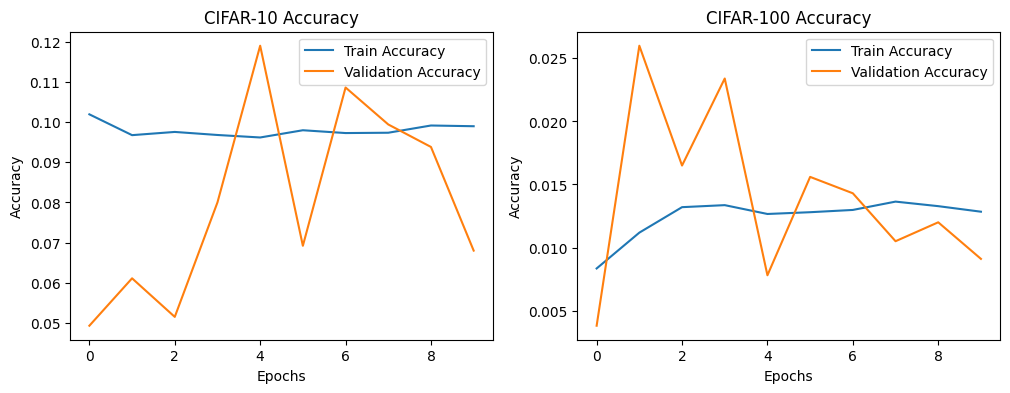

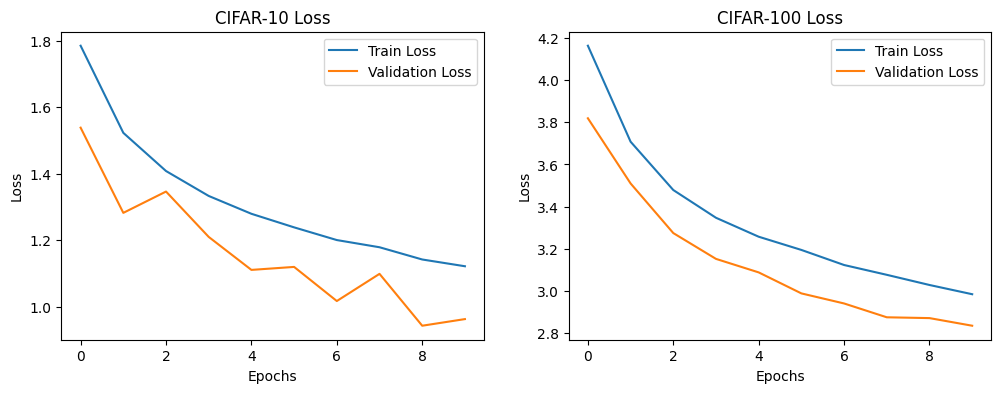

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(cifar10_train_images, cifar10_train_labels), (cifar10_test_images, cifar10_test_labels) = datasets.cifar10.load_data()

# Load CIFAR-100 dataset
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = datasets.cifar100.load_data()

# Normalize the images to a range of 0 to 1
cifar10_train_images, cifar10_test_images = cifar10_train_images / 255.0, cifar10_test_images / 255.0
cifar100_train_images, cifar100_test_images = cifar100_train_images / 255.0, cifar100_test_images / 255.0

# Data augmentation for CIFAR-10
datagen_cifar10 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen_cifar10.fit(cifar10_train_images)

# Data augmentation for CIFAR-100
datagen_cifar100 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen_cifar100.fit(cifar100_train_images)

# Function to build CNN model for CIFAR-10
def build_cnn_model_cifar10(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Function to build CNN model for CIFAR-100
def build_cnn_model_cifar100(num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Build and compile the CIFAR-10 model
model_cifar10 = build_cnn_model_cifar10(num_classes=10)
model_cifar10.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the CIFAR-10 model with augmented data
history_cifar10 = model_cifar10.fit(datagen_cifar10.flow(cifar10_train_images, cifar10_train_labels, batch_size=64),
                                    epochs=10,
                                    validation_data=(cifar10_test_images, cifar10_test_labels))

# Build and compile the CIFAR-100 model
model_cifar100 = build_cnn_model_cifar100(num_classes=100)
model_cifar100.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the CIFAR-100 model with augmented data
history_cifar100 = model_cifar100.fit(datagen_cifar100.flow(cifar100_train_images, cifar100_train_labels, batch_size=64),
                                      epochs=10,
                                      validation_data=(cifar100_test_images, cifar100_test_labels))

# Evaluate CIFAR-10 model
cifar10_test_loss, cifar10_test_acc = model_cifar10.evaluate(cifar10_test_images, cifar10_test_labels, verbose=2)
print(f'\nCIFAR-10 Test accuracy: {cifar10_test_acc}')

# Evaluate CIFAR-100 model
cifar100_test_loss, cifar100_test_acc = model_cifar100.evaluate(cifar100_test_images, cifar100_test_labels, verbose=2)
print(f'\nCIFAR-100 Test accuracy: {cifar100_test_acc}')

# Plot training & validation accuracy for CIFAR-10
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cifar10.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar10.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-10 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation accuracy for CIFAR-100
plt.subplot(1, 2, 2)
plt.plot(history_cifar100.history['accuracy'], label='Train Accuracy')
plt.plot(history_cifar100.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-100 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plot training & validation loss for CIFAR-10
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cifar10.history['loss'], label='Train Loss')
plt.plot(history_cifar10.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-10 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation loss for CIFAR-100
plt.subplot(1, 2, 2)
plt.plot(history_cifar100.history['loss'], label='Train Loss')
plt.plot(history_cifar100.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-100 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
